# TFM

In [1]:
pip uninstall pandas

Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pandas-1.3.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas/*
Proceed (Y/n)? Y
  Successfully uninstalled pandas-1.3.5


In [2]:
pip install pandas==1.3.5

  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.18.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
bigframes 1.13.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
geopandas 0.14.4 requires pandas>=1.4.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
statsmodels 0.14.2 requires pandas!=2.1.0,>=1.4, but you have pandas 1.3.5 which

In [3]:
import pandas as pd
print(pd.__version__)

1.3.5


In [4]:
import os
import pandas as pd

In [ ]:
data_dir = os.getcwd()

In [ ]:
# Step 3: List and read all CSV files in the directory
if os.path.exists(data_dir):
    files = os.listdir(data_dir)
    csv_files = [file for file in files if file.endswith('.csv')]

    # Dictionary to store DataFrames with their filenames
    dataframes = {}

    # Step 4: Read each CSV file into a DataFrame
    for csv_file in csv_files:
        file_path = os.path.join(data_dir, csv_file)
        df = pd.read_csv(file_path)
        dataframes[csv_file] = df
        print(f"Read {csv_file} into a DataFrame.")

    # Optionally: Display the first few rows of each DataFrame
    for file_name, df in dataframes.items():
        print(f"\nDataFrame from {file_name}:")
else:
    print(f"Directory {data_dir} does not exist.")

Read final_balance_sheet_growth_data_1985_2023.csv into a DataFrame.
Read final_cash_flow_data_1985_2023_quarter.csv into a DataFrame.
Read final_financial_data_1985_2023_quarter.csv into a DataFrame.
Read final_balance_sheet_data_1985_2023.csv into a DataFrame.
Read final_key_metrics_data_1985_2023.csv into a DataFrame.
Read final_financial_data_1985_2023.csv into a DataFrame.
Read final_ratios_data_1985_2023.csv into a DataFrame.
Read final_income_statement_growth_data_1985_2023.csv into a DataFrame.
Read final_cash_flow_statement_growth_data_1985_2023.csv into a DataFrame.
Read df_closest_dates_filtered.csv into a DataFrame.
Read market_cap_shares.csv into a DataFrame.
Read final_financial_growth_data_1985_2023.csv into a DataFrame.
Read final_income_statement_data_1985_2023.csv into a DataFrame.
Read final_cash_flow_statement_data_1985_2023.csv into a DataFrame.
Read s&p_changes.csv into a DataFrame.
Read final_balance_sheet_data_1985_2023_quarter.csv into a DataFrame.

DataFrame f

## Functions

In [ ]:
dataframes.keys()

dict_keys(['final_balance_sheet_growth_data_1985_2023.csv', 'final_cash_flow_data_1985_2023_quarter.csv', 'final_financial_data_1985_2023_quarter.csv', 'final_balance_sheet_data_1985_2023.csv', 'final_key_metrics_data_1985_2023.csv', 'final_financial_data_1985_2023.csv', 'final_ratios_data_1985_2023.csv', 'final_income_statement_growth_data_1985_2023.csv', 'final_cash_flow_statement_growth_data_1985_2023.csv', 'df_closest_dates_filtered.csv', 'final_financial_growth_data_1985_2023.csv', 'final_income_statement_data_1985_2023.csv', 'final_cash_flow_statement_data_1985_2023.csv', 'final_balance_sheet_data_1985_2023_quarter.csv'])

In [ ]:
# Define the function to calculate intrinsic value
def get_intrinsic_value(
    cash_flow: float,
    growth_rate: float,
    perpetual_growth_rate: float,
    weighted_average_cost_of_capital: float,
    cash_and_cash_equivalents: float,
    total_debt: float,
    shares_outstanding: float,
    periods: int = 5,
) -> float:
    components = {}

    cash_flow_projection = [cash_flow]

    # Cash Flow to Use
    for period in range(1, periods + 1):
        if period == 1:
            cash_flow_projection.append(cash_flow_projection[0] * (1 + growth_rate))
        else:
            cash_flow_projection.append(
                cash_flow_projection[period - 1] * (1 + growth_rate)
            )

    # Calculate the Terminal Value
    terminal_value = (
        cash_flow_projection[-1]
        * (1 + perpetual_growth_rate)
        / (weighted_average_cost_of_capital - perpetual_growth_rate)
    )

    # Add Terminal Value to the end of the cash flow projection
    cash_flow_projection[-1] = cash_flow_projection[-1] + terminal_value

    # Calculate the Present Value based on the Discounted Cash Flow Formula
    cash_flow_present_value = []
    for index, cash_flow_value in enumerate(cash_flow_projection):
        cash_flow_present_value.append(
            cash_flow_value / (1 + weighted_average_cost_of_capital) ** (index + 1)
        )

    # Calculate the Enterprise Value
    enterprise_value = sum(cash_flow_present_value)

    # Calculate the Equity Value
    equity_value = enterprise_value + cash_and_cash_equivalents - total_debt

    # Calculate the Intrinsic Value
    intrinsic_value = equity_value / shares_outstanding

    return round(intrinsic_value, 2)

# Function to calculate average growth rate for the past 5 years, filtered by symbol and year
def calculate_average_growth_rate(df, symbol, value_col, year, year_col='date', years=5):
    df = df[(df['symbol'] == symbol) & (df[year_col].dt.year <= year)].copy()
    df[year_col] = pd.to_datetime(df[year_col])
    recent_years = df[year_col].dt.year.nlargest(years).unique()
    recent_data = df[df[year_col].dt.year.isin(recent_years)]
    average_growth_rate = recent_data[value_col].mean()
    return average_growth_rate

# Function to calculate Altman Z-Score
def calcular_z_score_altman(balance_sheet, financials, market_cap):
    capital_trabajo = balance_sheet['cashAndCashEquivalents'] - balance_sheet['totalCurrentLiabilities']
    activos_totales = balance_sheet['totalAssets']
    utilidades_retenidas = balance_sheet['retainedEarnings']
    EBIT = financials['operatingIncome']
    valor_mercado_capital = market_cap
    valor_libros_deuda_total = balance_sheet['totalDebt']
    ventas = financials['revenue']

    A = capital_trabajo / activos_totales
    B = utilidades_retenidas / activos_totales
    C = EBIT / activos_totales
    D = valor_mercado_capital / valor_libros_deuda_total
    E = ventas / activos_totales

    Z = 1.2 * A + 1.4 * B + 3.3 * C + 0.6 * D + 1.0 * E
    return Z

# Function to calculate Piotroski F-Score
def calcular_piotroski_score(balance_sheet, financials, cash_flow):
    # Profitability
    ROA = financials['netIncome'] / balance_sheet['totalAssets']
    CFO = cash_flow['operatingCashFlow']
    ROA_Delta = financials['ROA_Delta']
    CFO_ROA = CFO / balance_sheet['totalAssets']

    # Leverage, Liquidity and Source of Funds
    Leverage_Delta = balance_sheet['Leverage_Delta']
    Current_Ratio_Delta = balance_sheet['Current_Ratio_Delta']
    Shares_Delta = financials['Shares_Delta']

    # Operating Efficiency
    Gross_Margin_Delta = financials['Gross_Margin_Delta']
    Asset_Turnover_Delta = financials['Asset_Turnover_Delta']

    # Piotroski Score calculation
    score = (ROA > 0).astype(int) + (CFO > 0).astype(int) + (ROA_Delta > 0).astype(int) + \
            (CFO_ROA > ROA).astype(int) + (Leverage_Delta < 0).astype(int) + (Current_Ratio_Delta > 0).astype(int) + \
            (Shares_Delta <= 0).astype(int) + (Gross_Margin_Delta > 0).astype(int) + (Asset_Turnover_Delta > 0)

    return score.sum()

### Prueba apple

In [ ]:
# Load the growth datasets
balance_sheet_growth = dataframes['final_balance_sheet_growth_data_1985_2023.csv']
cash_flow_growth = dataframes['final_cash_flow_statement_growth_data_1985_2023.csv']
financial_growth = dataframes['final_financial_growth_data_1985_2023.csv']
income_statement_growth = dataframes['final_income_statement_growth_data_1985_2023.csv']

# Load datasets
market_cap_shares = dataframes['market_cap_shares.csv']
cash_flow_data = dataframes['final_cash_flow_statement_data_1985_2023.csv']
balance_sheet_data = dataframes['final_balance_sheet_data_1985_2023_quarter.csv']
income_statement_data = dataframes['final_income_statement_data_1985_2023.csv']

# Ensure date columns are in datetime format
balance_sheet_growth['date'] = pd.to_datetime(balance_sheet_growth['date'])
cash_flow_growth['date'] = pd.to_datetime(cash_flow_growth['date'])
financial_growth['date'] = pd.to_datetime(financial_growth['date'])
income_statement_growth['date'] = pd.to_datetime(income_statement_growth['date'])
cash_flow_data['date'] = pd.to_datetime(cash_flow_data['date'])
balance_sheet_data['date'] = pd.to_datetime(balance_sheet_data['date'])

# Prepare a DataFrame to store results
results = []
terminal_growth_rate = 0.02
# Iterate over each year from 1990 to 2023
for year in range(1990, 2024):
    # Filter for the ticker 'AAPL' and the current year
    ticker = 'AAPL'

    shares_outstanding_row = market_cap_shares[(market_cap_shares['Year'] == year) & (market_cap_shares['Ticker'] == ticker)]
    cash_flow_row = cash_flow_data[(cash_flow_data['date'].dt.year == year) & (cash_flow_data['symbol'] == ticker)]
    cash_and_cash_equivalents_row = balance_sheet_data[(balance_sheet_data['date'].dt.year == year) & (balance_sheet_data['symbol'] == ticker)]
    total_debt_row = balance_sheet_data[(balance_sheet_data['date'].dt.year == year) & (balance_sheet_data['symbol'] == ticker)]

    # Check if data is available for the current year
    if shares_outstanding_row.empty or cash_flow_row.empty or cash_and_cash_equivalents_row.empty or total_debt_row.empty:
        continue

    shares_outstanding = shares_outstanding_row['OutstandingShares'].values[0]
    cash_flow = cash_flow_row['operatingCashFlow'].values[0]
    cash_and_cash_equivalents = cash_and_cash_equivalents_row['cashAndCashEquivalents'].values[0]
    total_debt = total_debt_row['totalDebt'].values[0]

    # Calculate average growth rates for the past 5 years for the given symbol and year
    avg_balance_sheet_growth = calculate_average_growth_rate(balance_sheet_growth, ticker, value_col='growthTotalAssets', year=year)
    avg_cash_flow_growth = calculate_average_growth_rate(cash_flow_growth, ticker, value_col='growthOperatingCashFlow', year=year)
    avg_financial_growth = calculate_average_growth_rate(financial_growth, ticker, value_col='revenueGrowth', year=year)
    avg_income_statement_growth = calculate_average_growth_rate(income_statement_growth, ticker, value_col='growthNetIncome', year=year)

    # Use the average of these growth rates for DCF calculation
    average_growth_rate = (avg_balance_sheet_growth + avg_cash_flow_growth + avg_financial_growth + avg_income_statement_growth) / 4

    # Calculate intrinsic value for the current year
    intrinsic_value = get_intrinsic_value(
        cash_flow=cash_flow,
        growth_rate=average_growth_rate,
        perpetual_growth_rate=terminal_growth_rate,
        weighted_average_cost_of_capital=0.10,  # Given assumption
        cash_and_cash_equivalents=cash_and_cash_equivalents,
        total_debt=total_debt,
        shares_outstanding=shares_outstanding
    )

    # Store the result
    results.append({'Ticker': ticker, 'Year': year, 'Intrinsic Value': intrinsic_value})

# Convert results to DataFrame
intrinsic_values_df = pd.DataFrame(results)

# Display the results
print(intrinsic_values_df)


   Ticker  Year  Intrinsic Value
0    AAPL  1990             3.52
1    AAPL  1991             0.26
2    AAPL  1992             5.28
3    AAPL  1993            -1.65
4    AAPL  1994             3.58
5    AAPL  1995            -0.87
6    AAPL  1996             2.16
7    AAPL  1998             2.07
8    AAPL  1999             0.97
9    AAPL  2000             1.26
10   AAPL  2001             0.27
11   AAPL  2002             0.26
12   AAPL  2003             0.55
13   AAPL  2004             2.64
14   AAPL  2005            15.52
15   AAPL  2006            20.92
16   AAPL  2007            53.74
17   AAPL  2008            88.15
18   AAPL  2009            46.93
19   AAPL  2010            52.84
20   AAPL  2011           138.54
21   AAPL  2012           159.96
22   AAPL  2013           136.00
23   AAPL  2014           150.39
24   AAPL  2015           147.99
25   AAPL  2016            66.29
26   AAPL  2017            46.09
27   AAPL  2018            67.83
28   AAPL  2019            58.28
29   AAPL 

# Creación datos piotroski

In [ ]:
import os
import pandas as pd
import yfinance as yf
import logging

# Suppress specific yfinance warnings
logging.getLogger("yfinance").setLevel(logging.ERROR)

# Load the dataframes (assuming these steps are already done, as shown in your original code)
# balance_sheet_growth = dataframes['final_balance_sheet_growth_data_1985_2023.csv']
# cash_flow_growth = dataframes['final_cash_flow_statement_growth_data_1985_2023.csv']
# financial_growth = dataframes['final_financial_growth_data_1985_2023.csv']
# income_statement_growth = dataframes['final_income_statement_growth_data_1985_2023.csv']
# market_cap_shares = dataframes['market_cap_shares.csv']
# cash_flow_data = dataframes['final_cash_flow_statement_data_1985_2023.csv']
# balance_sheet_data = dataframes['final_balance_sheet_data_1985_2023_quarter.csv']

# Calculate necessary deltas across the entire dataset first
balance_sheet_data['Leverage_Delta'] = balance_sheet_data['totalDebt'].pct_change().fillna(0)
balance_sheet_data['Current_Ratio'] = balance_sheet_data['totalCurrentAssets'] / balance_sheet_data['totalCurrentLiabilities']
balance_sheet_data['Current_Ratio_Delta'] = balance_sheet_data['Current_Ratio'].pct_change().fillna(0)

income_statement_data['Shares_Delta'] = income_statement_data['weightedAverageShsOut'].pct_change().fillna(0)
income_statement_data['Gross_Margin'] = income_statement_data['grossProfit'] / income_statement_data['revenue']
income_statement_data['Gross_Margin_Delta'] = income_statement_data['Gross_Margin'].pct_change().fillna(0)
income_statement_data['Asset_Turnover'] = income_statement_data['revenue'] / balance_sheet_data['totalAssets']
income_statement_data['Asset_Turnover_Delta'] = income_statement_data['Asset_Turnover'].pct_change().fillna(0)
# Calculate ROA_Delta for all years first
income_statement_data['ROA'] = income_statement_data['netIncome'] / balance_sheet_data['totalAssets']
income_statement_data['ROA_Delta'] = income_statement_data['ROA'].diff().fillna(0)

# Load the closest dates filtered dataframe
df_closest_dates_filtered = dataframes["df_closest_dates_filtered.csv"]
# Drop rows with any NaN values
df_closest_dates_filtered_clean = df_closest_dates_filtered.dropna()

# Ensure date columns are in datetime format
balance_sheet_growth['date'] = pd.to_datetime(balance_sheet_growth['date'])
cash_flow_growth['date'] = pd.to_datetime(cash_flow_growth['date'])
financial_growth['date'] = pd.to_datetime(financial_growth['date'])
income_statement_growth['date'] = pd.to_datetime(income_statement_growth['date'])
cash_flow_data['date'] = pd.to_datetime(cash_flow_data['date'])
balance_sheet_data['date'] = pd.to_datetime(balance_sheet_data['date'])
income_statement_data['date'] = pd.to_datetime(income_statement_data['date'])
balance_sheet_data['date'] = pd.to_datetime(balance_sheet_data['date'])
cash_flow_data['date'] = pd.to_datetime(cash_flow_data['date'])

/Users/Santiago/opt/anaconda3/lib/python3.9/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


# Obtención variables a analizar

In [ ]:
import pandas as pd
import yfinance as yf
import warnings
import logging
import sys
import contextlib
import io
from tqdm import tqdm

# Suppress divide by zero warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, message='divide by zero encountered in scalar divide')

# Custom context manager to filter specific output
@contextlib.contextmanager
def suppress_specific_output(suppress_text):
    old_stdout = sys.stdout
    old_stderr = sys.stderr
    sys.stdout = io.StringIO()
    sys.stderr = io.StringIO()
    yield
    sys.stdout.seek(0)
    sys.stderr.seek(0)
    for line in sys.stdout:
        if suppress_text not in line:
            old_stdout.write(line)
    for line in sys.stderr:
        if suppress_text not in line:
            old_stderr.write(line)
    sys.stdout = old_stdout
    sys.stderr = old_stderr

In [ ]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm.notebook import tqdm

def process_single_ticker_date(ticker, date_str, year, market_cap_shares, cash_flow_data, balance_sheet_data, income_statement_data, terminal_growth_rate, price_cache, fetch_pbar):
    results = []

    shares_outstanding_row = market_cap_shares[(market_cap_shares['Year'] == year) & (market_cap_shares['Ticker'] == ticker)]
    cash_flow_row = cash_flow_data[(cash_flow_data['date'].dt.year == year) & (cash_flow_data['symbol'] == ticker)]
    cash_and_cash_equivalents_row = balance_sheet_data[(balance_sheet_data['date'].dt.year == year) & (balance_sheet_data['symbol'] == ticker)]
    total_debt_row = balance_sheet_data[(balance_sheet_data['date'].dt.year == year) & (balance_sheet_data['symbol'] == ticker)]

    if shares_outstanding_row.empty or cash_flow_row.empty or cash_and_cash_equivalents_row.empty or total_debt_row.empty:
        return {'Ticker': ticker, 'Year': year, 'Intrinsic Value': 0, 'Stock Price': 0,
                'Altman Z-Score': None, 'Piotroski F-Score': None}

    shares_outstanding = shares_outstanding_row['OutstandingShares'].values[0]
    cash_flow = cash_flow_row['operatingCashFlow'].values[0]
    cash_and_cash_equivalents = cash_and_cash_equivalents_row['cashAndCashEquivalents'].values[0]
    total_debt = total_debt_row['totalDebt'].values[0]

    average_growth_rate = calculate_average_growth_rates(ticker, year)

    intrinsic_value = get_intrinsic_value(
        cash_flow=cash_flow,
        growth_rate=average_growth_rate,
        perpetual_growth_rate=terminal_growth_rate,
        weighted_average_cost_of_capital=0.10,  # Given assumption
        cash_and_cash_equivalents=cash_and_cash_equivalents,
        total_debt=total_debt,
        shares_outstanding=shares_outstanding
    )

    with suppress_specific_output('possibly delisted'):
        stock_price = fetch_stock_price(ticker, date_str, cache=price_cache, pbar=fetch_pbar)

    altman_z, piotroski_score = calculate_scores(year, ticker, balance_sheet_data, income_statement_data, cash_flow_data, market_cap_shares)

    return {
        'Ticker': ticker,
        'Year': year,
        'Intrinsic Value': intrinsic_value,
        'Stock Price': stock_price,
        'Altman Z-Score': altman_z,
        'Piotroski F-Score': piotroski_score
    }

def process_ticker_data(closest_dates_df, market_cap_shares, cash_flow_data, balance_sheet_data, income_statement_data, terminal_growth_rate):
    results = []
    price_cache = {}
    total_steps = closest_dates_df.shape[0]
    fetch_steps = total_steps * 2  # Assuming fetching price is half of the total processing time

    with ThreadPoolExecutor(max_workers=16) as executor:
        future_to_ticker_date = {}
        with tqdm(total=total_steps, desc="Processing tickers and dates") as pbar:
            with tqdm(total=fetch_steps, desc="Fetching stock prices") as fetch_pbar:
                for _, row in closest_dates_df.iterrows():
                    date_str = row['date']
                    year = row['year']
                    selected_tickers = row['tickers'].split(',')

                    for ticker in selected_tickers:
                        future = executor.submit(
                            process_single_ticker_date,
                            ticker,
                            date_str,
                            year,
                            market_cap_shares,
                            cash_flow_data,
                            balance_sheet_data,
                            income_statement_data,
                            terminal_growth_rate,
                            price_cache,
                            fetch_pbar
                        )
                        future_to_ticker_date[future] = (ticker, date_str, year)

                for future in as_completed(future_to_ticker_date):
                    result = future.result()
                    results.append(result)
                    pbar.update(1)

    return results

In [ ]:
convert_to_datetime(income_statement_data, 'date')
convert_to_datetime(balance_sheet_data, 'date')
convert_to_datetime(cash_flow_data, 'date')
calculate_roa_and_delta(income_statement_data, balance_sheet_data)
intrinsic_values_df = pd.DataFrame(process_ticker_data(df_closest_dates_filtered_clean,
                                                       market_cap_shares,
                                                       cash_flow_data,
                                                       balance_sheet_data,
                                                       income_statement_data,
                                                       terminal_growth_rate))

Processing tickers and dates:   0%|          | 0/28 [00:00<?, ?it/s]

Fetching stock prices:   0%|          | 0/56 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm.notebook import tqdm

def process_single_ticker_date(ticker, date_str, year, market_cap_shares, cash_flow_data, balance_sheet_data, income_statement_data, terminal_growth_rate, price_cache, fetch_pbar):
    shares_outstanding_row = market_cap_shares[(market_cap_shares['Year'] == year) & (market_cap_shares['Ticker'] == ticker)]
    cash_flow_row = cash_flow_data[(cash_flow_data['date'].dt.year == year) & (cash_flow_data['symbol'] == ticker)]
    cash_and_cash_equivalents_row = balance_sheet_data[(balance_sheet_data['date'].dt.year == year) & (balance_sheet_data['symbol'] == ticker)]
    total_debt_row = balance_sheet_data[(balance_sheet_data['date'].dt.year == year) & (balance_sheet_data['symbol'] == ticker)]

    if shares_outstanding_row.empty or cash_flow_row.empty or cash_and_cash_equivalents_row.empty or total_debt_row.empty:
        return {'Ticker': ticker, 'Year': year, 'Intrinsic Value': 0, 'Stock Price': 0,
                'Altman Z-Score': None, 'Piotroski F-Score': None}

    shares_outstanding = shares_outstanding_row['OutstandingShares'].values[0]
    cash_flow = cash_flow_row['operatingCashFlow'].values[0]
    cash_and_cash_equivalents = cash_and_cash_equivalents_row['cashAndCashEquivalents'].values[0]
    total_debt = total_debt_row['totalDebt'].values[0]

    average_growth_rate = calculate_average_growth_rates(ticker, year)

    intrinsic_value = get_intrinsic_value(
        cash_flow=cash_flow,
        growth_rate=average_growth_rate,
        perpetual_growth_rate=terminal_growth_rate,
        weighted_average_cost_of_capital=0.10,  # Given assumption
        cash_and_cash_equivalents=cash_and_cash_equivalents,
        total_debt=total_debt,
        shares_outstanding=shares_outstanding
    )

    with suppress_specific_output('possibly delisted'):
        stock_price = fetch_stock_price(ticker, date_str, cache=price_cache, pbar=fetch_pbar)

    altman_z, piotroski_score = calculate_scores(year, ticker, balance_sheet_data, income_statement_data, cash_flow_data, market_cap_shares)

    return {
        'Ticker': ticker,
        'Year': year,
        'Intrinsic Value': intrinsic_value,
        'Stock Price': stock_price,
        'Altman Z-Score': altman_z,
        'Piotroski F-Score': piotroski_score
    }

def process_ticker_data(closest_dates_df, market_cap_shares, cash_flow_data, balance_sheet_data, income_statement_data, terminal_growth_rate):
    results = []
    price_cache = {}
    total_steps = closest_dates_df.shape[0]
    fetch_steps = total_steps * 2  # Assuming fetching price is half of the total processing time

    # Increase max_workers to speed up processing
    with ThreadPoolExecutor(max_workers=32) as executor:  # Adjust max_workers based on your system's capabilities
        future_to_ticker_date = {}
        with tqdm(total=total_steps, desc="Processing tickers and dates") as pbar:
            with tqdm(total=fetch_steps, desc="Fetching stock prices") as fetch_pbar:
                for _, row in closest_dates_df.iterrows():
                    date_str = row['date']
                    year = row['year']
                    selected_tickers = row['tickers'].split(',')

                    for ticker in selected_tickers:
                        future = executor.submit(
                            process_single_ticker_date,
                            ticker,
                            date_str,
                            year,
                            market_cap_shares,
                            cash_flow_data,
                            balance_sheet_data,
                            income_statement_data,
                            terminal_growth_rate,
                            price_cache,
                            fetch_pbar
                        )
                        future_to_ticker_date[future] = (ticker, date_str, year)

                for future in as_completed(future_to_ticker_date):
                    result = future.result()
                    results.append(result)
                    pbar.update(1)

    return results

In [ ]:
convert_to_datetime(income_statement_data, 'date')
convert_to_datetime(balance_sheet_data, 'date')
convert_to_datetime(cash_flow_data, 'date')
calculate_roa_and_delta(income_statement_data, balance_sheet_data)
intrinsic_values_df = pd.DataFrame(process_ticker_data(df_closest_dates_filtered_clean,
                                                       market_cap_shares,
                                                       cash_flow_data,
                                                       balance_sheet_data,
                                                       income_statement_data,
                                                       terminal_growth_rate))

Processing tickers and dates:   0%|          | 0/28 [00:00<?, ?it/s]

Fetching stock prices:   0%|          | 0/56 [00:00<?, ?it/s]

In [ ]:
intrinsic_values_df

,Ticker,Year,Intrinsic Value,Stock Price,Altman Z-Score,Piotroski F-Score
0,BSX,1996,149.51,10.937500,25.511762,4.0
1,KMB,1996,8990.14,14.547593,8.352779,5.0
2,ITW,1996,27.03,9.677560,6.870973,7.0
3,TGT,1996,15.44,4.672318,3.230652,5.0
4,CVX,1996,74.51,10.587966,5.891873,6.0
...,...,...,...,...,...,...
2699,EOG,2023,1659.12,118.639999,10.760375,6.0
2700,CDNS,2023,138.58,210.649994,57.115975,8.0
2701,META,2023,698.13,243.179993,16.447494,5.0
2702,VZ,2023,70.70,38.709999,1.291232,6.0


In [ ]:
# Step 2: Save the DataFrame to a CSV file
# intrinsic_values_df.to_csv('intrinsic_values_df.csv', index=False)

# Post process

In [ ]:
intrinsic_values_df = pd.read_csv("intrinsic_values_df.csv")

In [ ]:
intrinsic_values_df.head()

,Ticker,Year,Intrinsic Value,Stock Price,Altman Z-Score,Piotroski F-Score
0,BSX,1996,149.51,10.937500,25.511762,4.0
1,KMB,1996,8990.14,14.547593,8.352779,5.0
2,ITW,1996,27.03,9.677560,6.870973,7.0
3,TGT,1996,15.44,4.672318,3.230652,5.0
4,CVX,1996,74.51,10.587966,5.891873,6.0


In [ ]:
# Load the CSV file
df = intrinsic_values_df

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Add a column that divides intrinsic value by stock price
df['Intrinsic Value / Stock Price'] = df['Intrinsic Value'] / df['Stock Price']

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to normalize
columns_to_normalize = ['Altman Z-Score', 'Piotroski F-Score', 'Intrinsic Value / Stock Price']

# Convert columns to numeric and handle non-numeric values
for column in columns_to_normalize:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Handle infinite and NaN values before normalization
df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Drop rows with NaN values in the columns to normalize
df_clean = df.dropna(subset=columns_to_normalize)

# Normalize the columns
df_clean[columns_to_normalize] = scaler.fit_transform(df_clean[columns_to_normalize])

# Merge the cleaned and normalized data back to the original dataframe
df.update(df_clean)

# Assign weights
weights = {'Altman Z-Score': 0.1, 'Piotroski F-Score': 0.3, 'Intrinsic Value / Stock Price': 0.6}

# Calculate the final score
df['Final Score'] = (
    df['Altman Z-Score'] * weights['Altman Z-Score'] +
    df['Piotroski F-Score'] * weights['Piotroski F-Score'] +
    df['Intrinsic Value / Stock Price'] * weights['Intrinsic Value / Stock Price']
)

# Group by year and get the top 5 rows with the highest final scores
top_five_each_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Final Score')).reset_index(drop=True)

# Create a new dataframe with the year and the tickers of the top 5 highest final scores
result_df = top_five_each_year.groupby('Year').agg({'Ticker': lambda x: ', '.join(x)}).reset_index()

# Display the result
result_df

/var/folders/sh/42tsv7dn4t7b1bp29wq61fk80000gn/T/ipykernel_37197/1270512249.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[columns_to_normalize] = scaler.fit_transform(df_clean[columns_to_normalize])


,Year,Ticker
0,1996.0,"MDT, PFE, ORCL, AMGN, JNJ, MMM, PG, ITW, CPB, MRK"
1,1997.0,"ITW, FITB, INTC, ORCL, JNJ, ADP, PG, PEP, DIS, CI"
2,1998.0,"MDT, ADP, LLY, ITW, INTC, ORCL, SCHW, MMM, JCI..."
3,1999.0,"ADP, MMM, IPG, INTC, MDT, HD, SCHW, AAPL, LLY,..."
4,2000.0,"NTAP, ADP, MMM, CI, MDT, INTC, PFE, PEP, LLY, JNJ"
5,2001.0,"MDT, ADP, MMM, CAH, AIG, ORCL, INTC, HD, JNJ, PEP"
6,2002.0,"ADP, QCOM, ORCL, KSS, MMM, FITB, SBUX, INTC, H..."
7,2003.0,"ADP, ORCL, TXN, ITW, UPS, MMM, FITB, QCOM, INT..."
8,2004.0,"ORCL, ADP, TXN, UPS, FITB, SYK, INTC, PEP, MDT..."
9,2005.0,"ITW, UPS, AIG, JNJ, INTC, NKE, MDT, MMM, PEP, PGR"


In [ ]:
result_df.to_csv('result_df.csv', index=False)

## Código para identificar los mejores weights

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import yfinance as yf
import datetime
from IPython.display import display, clear_output
from tqdm.notebook import tqdm
from concurrent.futures import ThreadPoolExecutor

In [ ]:
# Assuming `df` is already defined and populated
# Add a column that divides intrinsic value by stock price
df['Intrinsic Value / Stock Price'] = df['Intrinsic Value'] / df['Stock Price']

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to normalize
columns_to_normalize = ['Altman Z-Score', 'Piotroski F-Score', 'Intrinsic Value / Stock Price']

# Convert columns to numeric and handle non-numeric values
for column in columns_to_normalize:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Handle infinite and NaN values before normalization
df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Drop rows with NaN values in the columns to normalize
df_clean = df.dropna(subset=columns_to_normalize)

# Normalize the columns
df_clean[columns_to_normalize] = scaler.fit_transform(df_clean[columns_to_normalize])

# Merge the cleaned and normalized data back to the original dataframe
df.update(df_clean)


In [ ]:
# Define the function to calculate the final score
def calculate_final_score(df, weights):
    df['Final Score'] = (
        df['Altman Z-Score'] * weights['Altman Z-Score'] +
        df['Piotroski F-Score'] * weights['Piotroski F-Score'] +
        df['Intrinsic Value / Stock Price'] * weights['Intrinsic Value / Stock Price']
    )
    return df

# Fetch all historical data for the given tickers and date range
def fetch_historical_data(tickers, start_date, end_date):
    historical_data = {}
    with tqdm(total=len(tickers), desc="Fetching historical data") as pbar:
        for ticker in tickers:
            try:
                historical_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
            except Exception as e:
                clear_output(wait=True)
                display(f"Error fetching data for {ticker}: {e}")
            pbar.update(1)
    return historical_data

# Define a function to simulate investments and calculate performance
def simulate_investment_performance(df, result_df, historical_data, sp500):
    years = result_df['Year'].unique()

    # Initialize a dataframe to track investments
    investment_df = pd.DataFrame(index=years, columns=['Total Value of Stocks', 'Total Value of S&P 500'])

    # Initialize a dictionary to track total returns of individual stocks
    total_returns = {}

    # Simulate investments
    initial_investment = 1000
    for year in years:
        tickers = result_df.loc[result_df['Year'] == year, 'Ticker'].values[0].split(', ')
        investment_per_stock = initial_investment / len(tickers)

        # Calculate the value of the stock investments
        total_value_stocks = 0
        for ticker in tickers:
            if ticker not in historical_data:
                continue
            year_start = datetime.datetime(int(year), 1, 1)
            year_end = datetime.datetime(int(year), 12, 31)

            # Check if there is data available for the stock
            stock_data = historical_data[ticker].loc[year_start:year_end]
            if stock_data.empty:
                continue

            # Get the initial price for the stock
            initial_price_date = stock_data.index[0]
            initial_price = stock_data.loc[initial_price_date]['Close']
            shares = investment_per_stock / initial_price
            current_price = historical_data[ticker]['Close'].iloc[-1]
            total_value_stocks += shares * current_price

            # Calculate total return for the stock
            if ticker not in total_returns:
                total_returns[ticker] = (current_price - initial_price) / initial_price

        # Calculate the value of the S&P 500 investment
        initial_sp500_date = sp500.loc[year_start:year_end].index[0]
        initial_sp500_price = sp500.loc[initial_sp500_date]['Close']
        sp500_shares = initial_investment / initial_sp500_price
        current_sp500_price = sp500['Close'].iloc[-1]
        total_value_sp500 = sp500_shares * current_sp500_price

        # Store the values in the dataframe
        investment_df.loc[year, 'Total Value of Stocks'] = total_value_stocks
        investment_df.loc[year, 'Total Value of S&P 500'] = total_value_sp500

    # Calculate the cumulative value over time
    investment_df = investment_df.apply(pd.to_numeric)
    investment_df['Cumulative Value of Stocks'] = investment_df['Total Value of Stocks'].cumsum()
    investment_df['Cumulative Value of S&P 500'] = investment_df['Total Value of S&P 500'].cumsum()

    # Calculate the yearly returns
    investment_df['Return of Stocks'] = investment_df['Cumulative Value of Stocks'].pct_change()
    investment_df['Return of S&P 500'] = investment_df['Cumulative Value of S&P 500'].pct_change()

    # Calculate the average annual return
    average_annual_return_stocks = investment_df['Return of Stocks'].mean()
    average_annual_return_sp500 = investment_df['Return of S&P 500'].mean()

    return average_annual_return_stocks, average_annual_return_sp500


# Define a function to evaluate the score for a given set of weights
def evaluate_weights(df, weights, historical_data, sp500, end_date, performance_dict):
    df_copy = df.copy()  # Create a copy of the DataFrame for thread safety
    df_copy = calculate_final_score(df_copy, weights)
    top_ten_each_year = df_copy.groupby('Year').apply(lambda x: x.nlargest(10, 'Final Score')).reset_index(drop=True)
    result_df = top_ten_each_year.groupby('Year').agg({'Ticker': lambda x: ', '.join(x)}).reset_index()
    avg_return_stocks, avg_return_sp500 = simulate_investment_performance(df_copy, result_df, historical_data, sp500)
    performance_dict[tuple(weights.values())] = avg_return_stocks - avg_return_sp500  # Store the performance
    return avg_return_stocks - avg_return_sp500  # We want the stocks' average return to outperform S&P 500

In [ ]:
# Define a range of weights to test
weight_range = np.arange(0.0, 1.1, 0.1)
best_score = -np.inf
best_weights = None
end_date = datetime.date.today()

# Fetch all historical data for the given tickers and S&P 500
all_tickers = df['Ticker'].unique()
historical_data = fetch_historical_data(all_tickers, start_date=f'{int(df["Year"].min())}-01-01', end_date=end_date)
sp500 = yf.download('^GSPC', start=f'{int(df["Year"].min())}-01-01', end=end_date)

# Calculate the total number of combinations for the progress bar
total_combinations = sum(1 for _ in np.ndindex(len(weight_range), len(weight_range), len(weight_range))
                         if np.isclose(sum(weight_range[_[i]] for i in range(3)), 1.0))

# Grid search for the best weights with progress bar and parallel processing
with tqdm(total=total_combinations, desc="Evaluating weight combinations") as pbar:
    with ThreadPoolExecutor(max_workers=16) as executor:
        futures = []
        for w1 in weight_range:
            for w2 in weight_range:
                for w3 in weight_range:
                    if np.isclose(w1 + w2 + w3, 1.0):
                        weights = {'Altman Z-Score': w1, 'Piotroski F-Score': w2, 'Intrinsic Value / Stock Price': w3}
                        futures.append(executor.submit(evaluate_weights, df, weights, historical_data, sp500, end_date))

        for future in tqdm(futures, desc="Processing weight combinations"):
            score = future.result()
            if score > best_score:
                best_score = score
                best_weights = weights
            pbar.update(1)

# Apply the best weights to the dataframe
df = calculate_final_score(df, best_weights)

# Group by year and get the top 10 rows with the highest final scores
top_ten_each_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Final Score')).reset_index(drop=True)

# Create a new dataframe with the year and the tickers of the top 10 highest final scores
result_df = top_ten_each_year.groupby('Year').agg({'Ticker': lambda x: ', '.join(x)}).reset_index()

# Display the best weights and the result
clear_output(wait=True)
display("Best Weights:", best_weights)
display(result_df)

# Calculate and display the final performance comparison
avg_return_stocks, avg_return_sp500 = simulate_investment_performance(df, result_df, historical_data, sp500)
clear_output(wait=True)
display("Average Annual Return of Top Stocks Portfolio: {:.2%}".format(avg_return_stocks))
display("Average Annual Return of S&P 500: {:.2%}".format(avg_return_sp500))

'Average Annual Return of Top Stocks Portfolio: 10.56%'

'Average Annual Return of S&P 500: 10.71%'

In [ ]:

# Define a range of weights to test
weight_range = np.arange(0.0, 1.1, 0.1)
best_score = -np.inf
best_weights = None
end_date = datetime.date.today()

# Dictionary to store performance of all weight combinations
performance_dict = {}

# Fetch all historical data for the given tickers and S&P 500
all_tickers = df['Ticker'].unique()
historical_data = fetch_historical_data(all_tickers, start_date=f'{int(df["Year"].min())}-01-01', end_date=end_date)
sp500 = yf.download('^GSPC', start=f'{int(df["Year"].min())}-01-01', end=end_date)

# Calculate the total number of combinations for the progress bar
total_combinations = sum(1 for _ in np.ndindex(len(weight_range), len(weight_range), len(weight_range))
                         if np.isclose(sum(weight_range[_[i]] for i in range(3)), 1.0))

# Grid search for the best weights with progress bar and parallel processing
with tqdm(total=total_combinations, desc="Evaluating weight combinations") as pbar:
    with ThreadPoolExecutor(max_workers=32) as executor:
        futures = []
        for w1 in weight_range:
            for w2 in weight_range:
                for w3 in weight_range:
                    if np.isclose(w1 + w2 + w3, 1.0):
                        weights = {'Altman Z-Score': w1, 'Piotroski F-Score': w2, 'Intrinsic Value / Stock Price': w3}
                        futures.append(executor.submit(evaluate_weights, df, weights, historical_data, sp500, end_date, performance_dict))

        for future in tqdm(futures, desc="Processing weight combinations"):
            score = future.result()
            if score > best_score:
                best_score = score
                best_weights = weights
            pbar.update(1)

# Apply the best weights to the dataframe
df = calculate_final_score(df, best_weights)

# Group by year and get the top 10 rows with the highest final scores
top_ten_each_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Final Score')).reset_index(drop=True)

# Create a new dataframe with the year and the tickers of the top 10 highest final scores
result_df = top_ten_each_year.groupby('Year').agg({'Ticker': lambda x: ', '.join(x)}).reset_index()

# Display the best weights and the result
clear_output(wait=True)
display("Best Weights:", best_weights)
display(result_df)

# Calculate and display the final performance comparison
avg_return_stocks, avg_return_sp500 = simulate_investment_performance(df, result_df, historical_data, sp500)
clear_output(wait=True)
print("Average Annual Return of Top Stocks Portfolio: {:.2%}".format(avg_return_stocks))
print("Average Annual Return of S&P 500: {:.2%}".format(avg_return_sp500))

# Display all weight combinations and their performance
print("All weight combinations and their performance:")
for weights, performance in performance_dict.items():
    print(f"Weights: {weights}, Performance: {performance:.2%}")

,Year,Ticker
0,1996.0,"ORCL, MDT, INTC, AMGN, MRK, AN, BSX, NKE, BMY, HD"
1,1997.0,"GPS, MDT, INTC, ORCL, MRK, AMGN, BMY, JNJ, KO, HD"
2,1998.0,"MDT, INTC, ORCL, AMGN, HD, SCHW, BMY, GPS, CAH..."
3,1999.0,"ORCL, INTC, AMGN, MDT, ADP, HD, AMAT, GPS, BMY..."
4,2000.0,"NTAP, ORCL, MDT, AMGN, ADP, INTC, HD, BMY, TXN..."
5,2001.0,"MDT, ADP, ORCL, AMGN, INTC, WBA, HD, JNJ, AMAT..."
6,2002.0,"QCOM, ADP, SBUX, ORCL, INTC, HD, AMAT, PEP, SY..."
7,2003.0,"SBUX, ADP, ORCL, QCOM, INTC, EBAY, AMAT, HD, T..."
8,2004.0,"SBUX, SYK, ORCL, ADP, INTC, TXN, EBAY, HD, AMA..."
9,2005.0,"SBUX, GILD, TXN, AMAT, JNJ, INTC, XOM, HD, BBY..."


In [ ]:

# Display the best weights and the result
clear_output(wait=True)
display("Best Weights:", best_weights)
display(result_df)

# Calculate and display the final performance comparison
avg_return_stocks, avg_return_sp500 = simulate_investment_performance(df, result_df, historical_data, sp500)
clear_output(wait=True)
display("Average Annual Return of Top Stocks Portfolio: {:.2%}".format(avg_return_stocks))
display("Average Annual Return of S&P 500: {:.2%}".format(avg_return_sp500))

# Display all weight combinations and their performance
display("All weight combinations and their performance:")
for weights, performance in performance_dict.items():
    display(f"Weights: {weights}, Performance: {performance:.2%}")

'Average Annual Return of Top Stocks Portfolio: 10.56%'

'Average Annual Return of S&P 500: 10.71%'

'All weight combinations and their performance:'

'Weights: (0.0, 0.30000000000000004, 0.7000000000000001), Performance: 4.09%'

'Weights: (0.0, 0.2, 0.8), Performance: 4.08%'

'Weights: (0.0, 0.4, 0.6000000000000001), Performance: 4.09%'

'Weights: (0.0, 0.5, 0.5), Performance: 4.09%'

'Weights: (0.0, 0.1, 0.9), Performance: 4.08%'

'Weights: (0.0, 0.6000000000000001, 0.4), Performance: 4.09%'

'Weights: (0.0, 0.7000000000000001, 0.30000000000000004), Performance: 4.09%'

'Weights: (0.0, 0.0, 1.0), Performance: 0.26%'

'Weights: (0.0, 0.9, 0.1), Performance: 4.09%'

'Weights: (0.0, 0.8, 0.2), Performance: 4.09%'

'Weights: (0.1, 0.1, 0.8), Performance: 4.31%'

'Weights: (0.0, 1.0, 0.0), Performance: 3.79%'

'Weights: (0.1, 0.30000000000000004, 0.6000000000000001), Performance: 4.32%'

'Weights: (0.1, 0.2, 0.7000000000000001), Performance: 4.31%'

'Weights: (0.1, 0.0, 0.9), Performance: 0.59%'

'Weights: (0.1, 0.4, 0.5), Performance: 4.32%'

'Weights: (0.1, 0.5, 0.4), Performance: 4.31%'

'Weights: (0.1, 0.6000000000000001, 0.30000000000000004), Performance: 3.49%'

'Weights: (0.1, 0.7000000000000001, 0.2), Performance: 3.49%'

'Weights: (0.1, 0.8, 0.1), Performance: 3.53%'

'Weights: (0.1, 0.9, 0.0), Performance: 3.53%'

'Weights: (0.2, 0.0, 0.8), Performance: 0.98%'

'Weights: (0.2, 0.1, 0.7000000000000001), Performance: 3.48%'

'Weights: (0.2, 0.2, 0.6000000000000001), Performance: 3.48%'

'Weights: (0.2, 0.30000000000000004, 0.5), Performance: 3.48%'

'Weights: (0.2, 0.6000000000000001, 0.2), Performance: 3.53%'

'Weights: (0.2, 0.5, 0.30000000000000004), Performance: 3.53%'

'Weights: (0.2, 0.4, 0.4), Performance: 3.49%'

'Weights: (0.2, 0.7000000000000001, 0.1), Performance: 3.53%'

'Weights: (0.2, 0.8, 0.0), Performance: 3.53%'

'Weights: (0.30000000000000004, 0.2, 0.5), Performance: 3.53%'

'Weights: (0.30000000000000004, 0.0, 0.7000000000000001), Performance: -0.27%'

'Weights: (0.30000000000000004, 0.1, 0.6000000000000001), Performance: 3.48%'

'Weights: (0.30000000000000004, 0.5, 0.2), Performance: 3.53%'

'Weights: (0.30000000000000004, 0.4, 0.30000000000000004), Performance: 3.53%'

'Weights: (0.30000000000000004, 0.6000000000000001, 0.1), Performance: 3.53%'

'Weights: (0.30000000000000004, 0.30000000000000004, 0.4), Performance: 3.53%'

'Weights: (0.30000000000000004, 0.7000000000000001, 0.0), Performance: 3.53%'

'Weights: (0.4, 0.0, 0.6000000000000001), Performance: -0.25%'

'Weights: (0.4, 0.2, 0.4), Performance: 3.52%'

'Weights: (0.4, 0.30000000000000004, 0.30000000000000004), Performance: 3.53%'

'Weights: (0.4, 0.4, 0.2), Performance: 3.53%'

'Weights: (0.4, 0.6000000000000001, 0.0), Performance: 3.53%'

'Weights: (0.4, 0.5, 0.1), Performance: 3.53%'

'Weights: (0.4, 0.1, 0.5), Performance: 3.52%'

'Weights: (0.5, 0.0, 0.5), Performance: -0.22%'

'Weights: (0.5, 0.1, 0.4), Performance: 3.52%'

'Weights: (0.5, 0.30000000000000004, 0.2), Performance: 3.53%'

'Weights: (0.5, 0.4, 0.1), Performance: 3.53%'

'Weights: (0.5, 0.2, 0.30000000000000004), Performance: 3.53%'

'Weights: (0.6000000000000001, 0.0, 0.4), Performance: -0.22%'

'Weights: (0.5, 0.5, 0.0), Performance: 3.53%'

'Weights: (0.6000000000000001, 0.30000000000000004, 0.1), Performance: 3.53%'

'Weights: (0.6000000000000001, 0.1, 0.30000000000000004), Performance: 3.52%'

'Weights: (0.7000000000000001, 0.1, 0.2), Performance: 3.52%'

'Weights: (0.6000000000000001, 0.2, 0.2), Performance: 3.53%'

'Weights: (0.7000000000000001, 0.0, 0.30000000000000004), Performance: -0.22%'

'Weights: (0.7000000000000001, 0.2, 0.1), Performance: 3.53%'

'Weights: (0.7000000000000001, 0.30000000000000004, 0.0), Performance: 3.53%'

'Weights: (0.6000000000000001, 0.4, 0.0), Performance: 3.53%'

'Weights: (0.8, 0.0, 0.2), Performance: -0.21%'

'Weights: (0.9, 0.0, 0.1), Performance: -0.17%'

'Weights: (0.8, 0.2, 0.0), Performance: 3.53%'

'Weights: (0.8, 0.1, 0.1), Performance: 3.53%'

'Weights: (0.9, 0.1, 0.0), Performance: 3.53%'

'Weights: (1.0, 0.0, 0.0), Performance: -0.15%'

## Forma final

In [4]:
import pandas as pd

# Load the result_df and intrinsic_values_df from the CSV files
result_df = pd.read_csv('result_df.csv')
intrinsic_values_df = pd.read_csv('intrinsic_values_df.csv')

# Extract the tickers from the first row of result_df
tickers = [ticker.strip() for ticker in result_df.iloc[0]['Ticker'].split(',')]

# FINAL

## Creamos clase portfolio

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the portfolio class
class Portfolio:
    def __init__(self, initial_cash):
        self.cash = initial_cash
        self.holdings = {}
        self.history = []
        self.annual_returns = []

    def buy_stock(self, ticker, amount, price):
        shares = amount / price
        cost = shares * price
        if self.cash >= cost:
            self.cash -= cost
            if ticker in self.holdings:
                self.holdings[ticker] += shares
            else:
                self.holdings[ticker] = shares
            self.history.append(('BUY', ticker, shares, price, cost))
        else:
            # Buy as much as possible with the remaining cash
            shares = self.cash / price
            cost = shares * price
            self.cash -= cost
            if ticker in self.holdings:
                self.holdings[ticker] += shares
            else:
                self.holdings[ticker] = shares
            self.history.append(('BUY', ticker, shares, price, cost))
            print(f"Not enough cash to buy {amount} euros worth of {ticker}. Bought {cost} euros worth instead.")

    def sell_stock(self, ticker, price):
        if ticker in self.holdings:
            shares = self.holdings[ticker]
            revenue = shares * price
            self.cash += revenue * 0.9 # We assume 20% taxes when selling the stock
            del self.holdings[ticker]
            self.history.append(('SELL', ticker, shares, price, revenue))
            return revenue
        else:
            print(f"No shares of {ticker} to sell")
            return 0

    def get_value(self, current_prices):
        total_value = self.cash
        for ticker, shares in self.holdings.items():
            total_value += shares * current_prices.get(ticker, 0)
        return total_value

    def calculate_annual_return(self, start_value, end_value):
        return (end_value - start_value) / start_value

## Cargado de información de los tickers

In [6]:
# Load historical data
tickers = set([ticker for sublist in [row['Ticker'].split(', ') for _, row in result_df.iterrows()] for ticker in sublist])
data = {ticker: yf.download(ticker, start="1996-01-01", end="2023-12-31") for ticker in tickers}

# Load S&P 500, Berkshire Hathaway, and other index funds data
sp500_data = yf.download('^GSPC', start="1996-01-01", end="2023-12-31")
brk_b_data = yf.download('BRK-B', start="1996-01-01", end="2023-12-31")
nasdaq_data = yf.download('^IXIC', start="1996-01-01", end="2023-12-31")

# Create the instructions dictionary with buy instructions only
instructions = {}
for index, row in result_df.iterrows():
    year = int(row['Year'])
    tickers_to_buy = row['Ticker'].split(', ')
    instructions[year] = {"BUY": [(ticker, 100) for ticker in tickers_to_buy], "SELL": []}

def get_nearest_price(ticker_data, date):
    """Get the nearest available price for a given date."""
    if date in ticker_data.index:
        return ticker_data.loc[date, "Close"]
    else:
        nearest_date = ticker_data.index[ticker_data.index.get_loc(date, method='nearest')]
        return ticker_data.loc[nearest_date, "Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Simulación

In [7]:
# Initialize portfolios
portfolio = Portfolio(initial_cash=10000)
sp500_portfolio = Portfolio(initial_cash=10000)
brk_b_portfolio = Portfolio(initial_cash=10000)
nasdaq_portfolio = Portfolio(initial_cash=10000)

# Track performance
portfolio_values = []
sp500_values = []
brk_b_values = []
nasdaq_values = []


# Simulate portfolio and other investments
for year, actions in instructions.items():
    # Add 1000 euros to the cash balance
    portfolio.cash += 1000
    sp500_portfolio.cash += 1000
    brk_b_portfolio.cash += 1000
    nasdaq_portfolio.cash += 1000

    # Sell stocks based on Piotroski score
    stocks_to_sell = []
    for ticker in portfolio.holdings.keys():
        intrinsic_data = intrinsic_values_df[(intrinsic_values_df['Ticker'] == ticker) & (intrinsic_values_df['Year'] == year)]
        if not intrinsic_data.empty:
            intrinsic_value = intrinsic_data.iloc[0]['Intrinsic Value']
            current_price = get_nearest_price(data[ticker], f'{year}-05-01')
            if current_price > 1.2 * intrinsic_value:
                stocks_to_sell.append(ticker)
    # Sell stocks based on Piotroski score
    for ticker in portfolio.holdings.keys():
        intrinsic_data = intrinsic_values_df[(intrinsic_values_df['Ticker'] == ticker) & (intrinsic_values_df['Year'] == year)]
        if not intrinsic_data.empty and intrinsic_data.iloc[0]['Piotroski F-Score'] <= 4:
            stocks_to_sell.append(ticker)


    # Execute sell instructions
    for ticker in set(stocks_to_sell):
        try:
            price = get_nearest_price(data[ticker], f'{year}-05-01')
            portfolio.sell_stock(ticker, price)
        except KeyError:
            print(f"Price data not available for {ticker} on {year}-05-01")

    # Evenly distribute cash to be invested among the stocks to be bought
    num_stocks_to_buy = len(actions["BUY"])
    if num_stocks_to_buy > 0:
        amount_per_stock = portfolio.cash / num_stocks_to_buy

        # Buy stocks for the portfolio
        for action in actions["BUY"]:
            ticker, _ = action
            try:
                price = get_nearest_price(data[ticker], f'{year}-05-01')
                portfolio.buy_stock(ticker, amount_per_stock, price)
            except KeyError:
                print(f"Price data not available for {ticker} on {year}-05-01")

    # Buy S&P 500, Berkshire Hathaway, and Nasdaq
    try:
        sp500_price = get_nearest_price(sp500_data, f'{year}-05-01')
        sp500_portfolio.buy_stock('^GSPC', 1000, sp500_price)
    except KeyError:
        print(f"Price data not available for S&P 500 on {year}-05-01")

    try:
        brk_b_price = get_nearest_price(brk_b_data, f'{year}-05-01')
        brk_b_portfolio.buy_stock('BRK-B', 1000, brk_b_price)
    except KeyError:
        print(f"Price data not available for Berkshire Hathaway on {year}-05-01")

    try:
        nasdaq_price = get_nearest_price(nasdaq_data, f'{year}-05-01')
        nasdaq_portfolio.buy_stock('^IXIC', 1000, nasdaq_price)
    except KeyError:
        print(f"Price data not available for Nasdaq on {year}-05-01")

    # Calculate portfolio and other investment values
    current_prices = {ticker: get_nearest_price(data[ticker], f'{year}-12-31') for ticker in tickers}
    sp500_year_end_price = get_nearest_price(sp500_data, f'{year}-12-31')
    brk_b_year_end_price = get_nearest_price(brk_b_data, f'{year}-12-31')
    nasdaq_year_end_price = get_nearest_price(nasdaq_data, f'{year}-12-31')

    portfolio_value = portfolio.get_value(current_prices)
    sp500_value = sp500_portfolio.get_value({'^GSPC': sp500_year_end_price})
    brk_b_value = brk_b_portfolio.get_value({'BRK-B': brk_b_year_end_price})
    nasdaq_value = nasdaq_portfolio.get_value({'^IXIC': nasdaq_year_end_price})

    if len(portfolio_values) > 0:
        portfolio_annual_return = portfolio.calculate_annual_return(portfolio_values[-1][1], portfolio_value)
        sp500_annual_return = sp500_portfolio.calculate_annual_return(sp500_values[-1][1], sp500_value)
        brk_b_annual_return = brk_b_portfolio.calculate_annual_return(brk_b_values[-1][1], brk_b_value)
        nasdaq_annual_return = nasdaq_portfolio.calculate_annual_return(nasdaq_values[-1][1], nasdaq_value)
    else:
        portfolio_annual_return = 0
        sp500_annual_return = 0
        brk_b_annual_return = 0
        nasdaq_annual_return = 0

    portfolio_values.append((year, portfolio_value, portfolio_annual_return))
    sp500_values.append((year, sp500_value, sp500_annual_return))
    brk_b_values.append((year, brk_b_value, brk_b_annual_return))
    nasdaq_values.append((year, nasdaq_value, nasdaq_annual_return))

    print(f"End of {year} Portfolio Value: {portfolio_value}, S&P 500 Value: {sp500_value}, BRK-B Value: {brk_b_value}, Nasdaq Value: {nasdaq_value}")

print("Final Portfolio:")
print("Cash:", portfolio.cash)
print("Holdings:", portfolio.holdings)
num_keys = len(portfolio.holdings)

print("Number of keys:", num_keys)

End of 1996 Portfolio Value: 13279.094828884541, S&P 500 Value: 11131.626341921625, BRK-B Value: 10958.620648265029, Nasdaq Value: 11076.163240012964
Not enough cash to buy 500.3534680436231 euros worth of CI. Bought 500.35346804362223 euros worth instead.
End of 1997 Portfolio Value: 17620.000239112494, S&P 500 Value: 12697.793600611527, BRK-B Value: 12548.152685595276, Nasdaq Value: 12545.005250405255
End of 1998 Portfolio Value: 24454.211821910394, S&P 500 Value: 14513.804800056798, BRK-B Value: 14910.46412127597, Nasdaq Value: 14724.01592795827
End of 1999 Portfolio Value: 41354.172808036965, S&P 500 Value: 16495.585814542763, BRK-B Value: 14564.783812058979, Nasdaq Value: 20367.36742154078
End of 2000 Portfolio Value: 40833.25537753238, S&P 500 Value: 16547.37761982023, BRK-B Value: 17312.37140995237, Nasdaq Value: 16417.99749950057
End of 2001 Portfolio Value: 33397.33365616482, S&P 500 Value: 16764.164979173598, BRK-B Value: 18765.580334486807, Nasdaq Value: 16361.323118289642
E

## Métricas y gráficas


Custom Portfolio Metrics:
Total Return: 3370.13%
Average Annual Return: 16.04%
Standard Deviation: 24.01%
Sharpe Ratio: 0.59
Max Drawdown: -38.13%

S&P 500 Metrics:
Total Return: 828.47%
Average Annual Return: 8.92%
Standard Deviation: 11.56%
Sharpe Ratio: 0.60
Max Drawdown: -21.42%

Berkshire Hathaway Metrics:
Total Return: 1314.47%
Average Annual Return: 10.53%
Standard Deviation: 11.42%
Sharpe Ratio: 0.75
Max Drawdown: -21.35%

Nasdaq Metrics:
Total Return: 1373.20%
Average Annual Return: 11.65%
Standard Deviation: 18.34%
Sharpe Ratio: 0.53
Max Drawdown: -30.62%


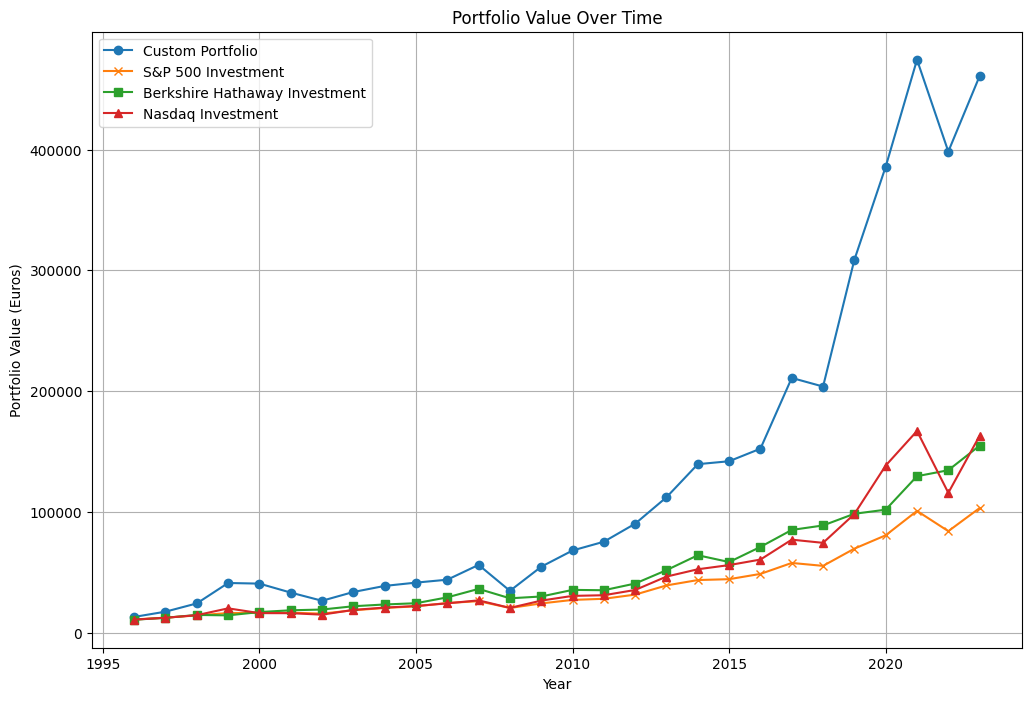

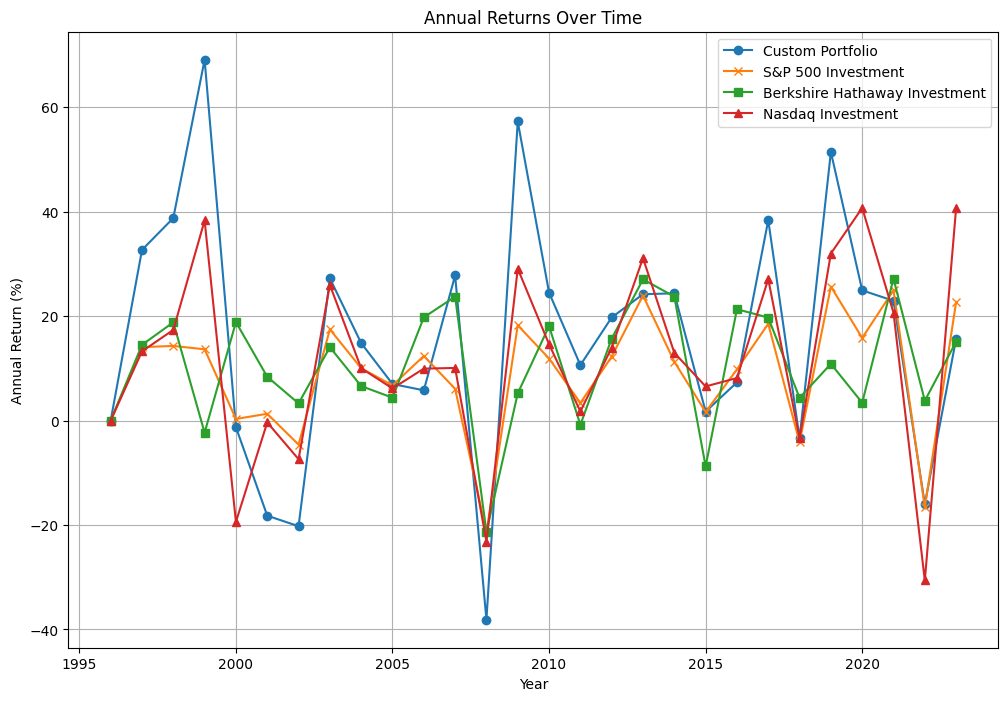

In [8]:
# Convert portfolio values to DataFrame for easier analysis
portfolio_df = pd.DataFrame(portfolio_values, columns=['Year', 'Portfolio Value', 'Annual Return'])
sp500_df = pd.DataFrame(sp500_values, columns=['Year', 'S&P 500 Value', 'Annual Return'])
brk_b_df = pd.DataFrame(brk_b_values, columns=['Year', 'BRK-B Value', 'Annual Return'])
nasdaq_df = pd.DataFrame(nasdaq_values, columns=['Year', 'Nasdaq Value', 'Annual Return'])

# Define risk metrics functions
def calculate_standard_deviation(df, column):
    return df[column].std()

def calculate_sharpe_ratio(df, column, risk_free_rate=0.02):
    excess_return = df[column] - risk_free_rate
    return excess_return.mean() / df[column].std()

def calculate_max_drawdown(df, column):
    roll_max = df[column].cummax()
    drawdown = df[column] / roll_max - 1.0
    return drawdown.min()

# Print final metrics for each portfolio
def print_metrics(df, name, value_column):
    total_return = (df.iloc[-1][value_column] - df.iloc[0][value_column]) / df.iloc[0][value_column]
    average_annual_return = df['Annual Return'].mean()
    standard_deviation = calculate_standard_deviation(df, 'Annual Return')
    sharpe_ratio = calculate_sharpe_ratio(df, 'Annual Return')
    max_drawdown = calculate_max_drawdown(df, value_column)

    print(f"\n{name} Metrics:")
    print(f"Total Return: {total_return * 100:.2f}%")
    print(f"Average Annual Return: {average_annual_return * 100:.2f}%")
    print(f"Standard Deviation: {standard_deviation * 100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown * 100:.2f}%")

print_metrics(portfolio_df, "Custom Portfolio", 'Portfolio Value')
print_metrics(sp500_df, "S&P 500", 'S&P 500 Value')
print_metrics(brk_b_df, "Berkshire Hathaway", 'BRK-B Value')
print_metrics(nasdaq_df, "Nasdaq", 'Nasdaq Value')

# Plot the portfolio value over time
plt.figure(figsize=(12, 8))
plt.plot(portfolio_df['Year'], portfolio_df['Portfolio Value'], marker='o', label='Custom Portfolio')
plt.plot(sp500_df['Year'], sp500_df['S&P 500 Value'], marker='x', label='S&P 500 Investment')
plt.plot(brk_b_df['Year'], brk_b_df['BRK-B Value'], marker='s', label='Berkshire Hathaway Investment')
plt.plot(nasdaq_df['Year'], nasdaq_df['Nasdaq Value'], marker='^', label='Nasdaq Investment')
plt.title('Portfolio Value Over Time')
plt.xlabel('Year')
plt.ylabel('Portfolio Value (Euros)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the annual returns
plt.figure(figsize=(12, 8))
plt.plot(portfolio_df['Year'], portfolio_df['Annual Return'] * 100, marker='o', label='Custom Portfolio')
plt.plot(sp500_df['Year'], sp500_df['Annual Return'] * 100, marker='x', label='S&P 500 Investment')
plt.plot(brk_b_df['Year'], brk_b_df['Annual Return'] * 100, marker='s', label='Berkshire Hathaway Investment')
plt.plot(nasdaq_df['Year'], nasdaq_df['Annual Return'] * 100, marker='^', label='Nasdaq Investment')
plt.title('Annual Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Return (%)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
## Calculate the number of years each portfolio had the highest annual return
def count_winning_years(portfolio_df, sp500_df, brk_b_df, nasdaq_df):
    winning_counts = {
        'Custom Portfolio': 0,
        'S&P 500': 0,
        'Berkshire Hathaway': 0,
        'Nasdaq': 0
    }

    for year in portfolio_df['Year']:
        annual_returns = {
            'Custom Portfolio': portfolio_df[portfolio_df['Year'] == year]['Annual Return'].values[0],
            'S&P 500': sp500_df[sp500_df['Year'] == year]['Annual Return'].values[0],
            'Berkshire Hathaway': brk_b_df[brk_b_df['Year'] == year]['Annual Return'].values[0],
            'Nasdaq': nasdaq_df[nasdaq_df['Year'] == year]['Annual Return'].values[0]
        }
        winning_portfolio = max(annual_returns, key=annual_returns.get)
        winning_counts[winning_portfolio] += 1

    return winning_counts

# Count the number of winning years for each portfolio
winning_counts = count_winning_years(portfolio_df, sp500_df, brk_b_df, nasdaq_df)

# Print the results
print("Number of Winning Years for Each Portfolio:")
for portfolio, count in winning_counts.items():
    print(f"{portfolio}: {count}")

Number of Winning Years for Each Portfolio:
Custom Portfolio: 15
S&P 500: 0
Berkshire Hathaway: 9
Nasdaq: 4


In [10]:
import numpy as np

# Define risk metrics functions
def calculate_standard_deviation(returns):
    return np.std(returns)

def calculate_sharpe_ratio(returns, risk_free_rate=0.02):
    excess_return = returns - risk_free_rate
    return np.mean(excess_return) / np.std(returns)

def calculate_sortino_ratio(returns, risk_free_rate=0.02):
    negative_returns = returns[returns < 0]
    downside_std = np.std(negative_returns)
    excess_return = returns - risk_free_rate
    return np.mean(excess_return) / downside_std

def calculate_max_drawdown(values):
    roll_max = np.maximum.accumulate(values)
    drawdown = (values - roll_max) / roll_max
    return np.min(drawdown)

def calculate_beta(portfolio_returns, market_returns):
    covariance_matrix = np.cov(portfolio_returns, market_returns)
    beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    return beta

# Convert returns and values to numpy arrays for easier calculations
portfolio_returns = portfolio_df['Annual Return'].values
sp500_returns = sp500_df['Annual Return'].values
brk_b_returns = brk_b_df['Annual Return'].values
nasdaq_returns = nasdaq_df['Annual Return'].values

portfolio_values = portfolio_df['Portfolio Value'].values
sp500_values = sp500_df['S&P 500 Value'].values
brk_b_values = brk_b_df['BRK-B Value'].values
nasdaq_values = nasdaq_df['Nasdaq Value'].values

# Calculate risk metrics for each portfolio
def print_risk_metrics(returns, values, name, market_returns):
    std_dev = calculate_standard_deviation(returns)
    sharpe = calculate_sharpe_ratio(returns)
    sortino = calculate_sortino_ratio(returns)
    max_dd = calculate_max_drawdown(values)
    beta = calculate_beta(returns, market_returns)

    print(f"\n{name} Risk Metrics:")
    print(f"Standard Deviation: {std_dev * 100:.2f}%")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Sortino Ratio: {sortino:.2f}")
    print(f"Max Drawdown: {max_dd * 100:.2f}%")
    print(f"Beta: {beta:.2f}")

print_risk_metrics(portfolio_returns, portfolio_values, "Custom Portfolio", sp500_returns)
print_risk_metrics(sp500_returns, sp500_values, "S&P 500", sp500_returns)
print_risk_metrics(brk_b_returns, brk_b_values, "Berkshire Hathaway", sp500_returns)
print_risk_metrics(nasdaq_returns, nasdaq_values, "Nasdaq", sp500_returns)



Custom Portfolio Risk Metrics:
Standard Deviation: 23.57%
Sharpe Ratio: 0.60
Sortino Ratio: 1.15
Max Drawdown: -38.13%
Beta: 1.64

S&P 500 Risk Metrics:
Standard Deviation: 11.35%
Sharpe Ratio: 0.61
Sortino Ratio: 0.92
Max Drawdown: -21.42%
Beta: 1.00

Berkshire Hathaway Risk Metrics:
Standard Deviation: 11.22%
Sharpe Ratio: 0.76
Sortino Ratio: 1.05
Max Drawdown: -21.35%
Beta: 0.62

Nasdaq Risk Metrics:
Standard Deviation: 18.01%
Sharpe Ratio: 0.54
Sortino Ratio: 0.87
Max Drawdown: -30.62%
Beta: 1.43


In [14]:
print("Transaction History:", portfolio.history)

AttributeError: 'str' object has no attribute 'history'